In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import os

In [2]:
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
df_train=pd.read_csv("dataset/train.csv")
df_train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [4]:
df_test=pd.read_csv("dataset/test.csv")
df_test.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


In [5]:
print(df_train.shape) # (6255, 13)
print(df_test.shape) # (180, 12)

(6255, 13)
(180, 12)


In [6]:
df_train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [7]:
df_test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


In [8]:
df_train_copy=df_train.copy()
df_test_copy=df_test.copy()

In [9]:
df_train_copy.dtypes

id                int64
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
Promotion1      float64
Promotion2      float64
Promotion3      float64
Promotion4      float64
Promotion5      float64
Unemployment    float64
IsHoliday          bool
Weekly_Sales    float64
dtype: object

In [10]:
df_test_copy.dtypes

id                int64
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
Promotion1      float64
Promotion2      float64
Promotion3      float64
Promotion4      float64
Promotion5      float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [11]:
df_train_copy["Date"]=pd.to_datetime(df_train_copy["Date"], dayfirst=True) # 날짜로 먼저 구문 분석하기.
df_train_copy["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6250   2012-08-31
6251   2012-09-07
6252   2012-09-14
6253   2012-09-21
6254   2012-09-28
Name: Date, Length: 6255, dtype: datetime64[ns]

In [12]:
df_train_copy["Date"].dt.year # .dt를 이용해서 원하는 정보를 추출할 수 있다.

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6250    2012
6251    2012
6252    2012
6253    2012
6254    2012
Name: Date, Length: 6255, dtype: int64

In [13]:
df_train_copy["Year"]=df_train_copy["Date"].dt.year
df_train_copy["Month"]=df_train_copy["Date"].dt.month
df_train_copy["Day"]=df_train_copy["Date"].dt.day

In [14]:
df_train_copy

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Year,Month,Day
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,2010,2,5
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,2010,2,12
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,2010,2,19
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,2010,2,26
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,2012,8,31
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2012,9,7
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,2012,9,14
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2012,9,21


In [15]:
def F2C(temperature):
    Celsius = (temperature - 32) * 5 / 9
    return Celsius

df_train_copy["Temperature"]=df_train_copy["Temperature"].apply(F2C)
df_train_copy["Temperature"]

0        5.727778
1        3.616667
2        4.405556
3        8.127778
4        8.055556
          ...    
6250    23.938889
6251    24.277778
6252    19.927778
6253    18.511111
6254    18.266667
Name: Temperature, Length: 6255, dtype: float64

In [16]:
df_train_copy

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Year,Month,Day
0,1,1,2010-02-05,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,2010,2,5
1,2,1,2010-02-12,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,2010,2,12
2,3,1,2010-02-19,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,2010,2,19
3,4,1,2010-02-26,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,2010,2,26
4,5,1,2010-03-05,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,23.938889,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,2012,8,31
6251,6252,45,2012-09-07,24.277778,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2012,9,7
6252,6253,45,2012-09-14,19.927778,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,2012,9,14
6253,6254,45,2012-09-21,18.511111,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2012,9,21


In [17]:
df_train_copy.isnull().sum()
# Promotion 쪽에서 NaN 값이 많이 존재한다.

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
Year               0
Month              0
Day                0
dtype: int64

In [18]:
# Store 정보
print(df_train_copy["Store"].nunique()) # Store의 종류의 개수 : 1 ~ 45
print(df_train_copy["Store"].value_counts().max()) # Store의 값의 최대값
print(df_train_copy["Store"].value_counts().min()) # Store의 값의 최소값

45
139
139


In [19]:
# 약 2년 6개월 정도 조사한 결과이다.
print(df_train_copy["Date"].nunique())
print(df_train_copy["Date"].value_counts())
print(df_train_copy["Date"].min()) # 2010-02-05 00:00:00
print(df_train_copy["Date"].max()) # 2012-09-28 00:00:00
print(df_train_copy["Date"].value_counts().max())
print(df_train_copy["Date"].value_counts().min())

139
2010-02-05    45
2011-12-02    45
2011-10-21    45
2011-10-28    45
2011-11-04    45
              ..
2010-11-12    45
2010-11-05    45
2010-10-29    45
2010-10-22    45
2012-09-28    45
Name: Date, Length: 139, dtype: int64
2010-02-05 00:00:00
2012-09-28 00:00:00
45
45


In [20]:
df_train_copy.dtypes

id                       int64
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
Promotion1             float64
Promotion2             float64
Promotion3             float64
Promotion4             float64
Promotion5             float64
Unemployment           float64
IsHoliday                 bool
Weekly_Sales           float64
Year                     int64
Month                    int64
Day                      int64
dtype: object

In [21]:
df_train_copy.columns

Index(['id', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Year', 'Month', 'Day'],
      dtype='object')

In [53]:
df_2010=df_train_copy.loc[df_train_copy["Year"]==2010] # 2010년 데이터 
df_2011=df_train_copy.loc[df_train_copy["Year"]==2011] # 2011년 데이터
df_2012=df_train_copy.loc[df_train_copy["Year"]==2012] # 2012년 데이터

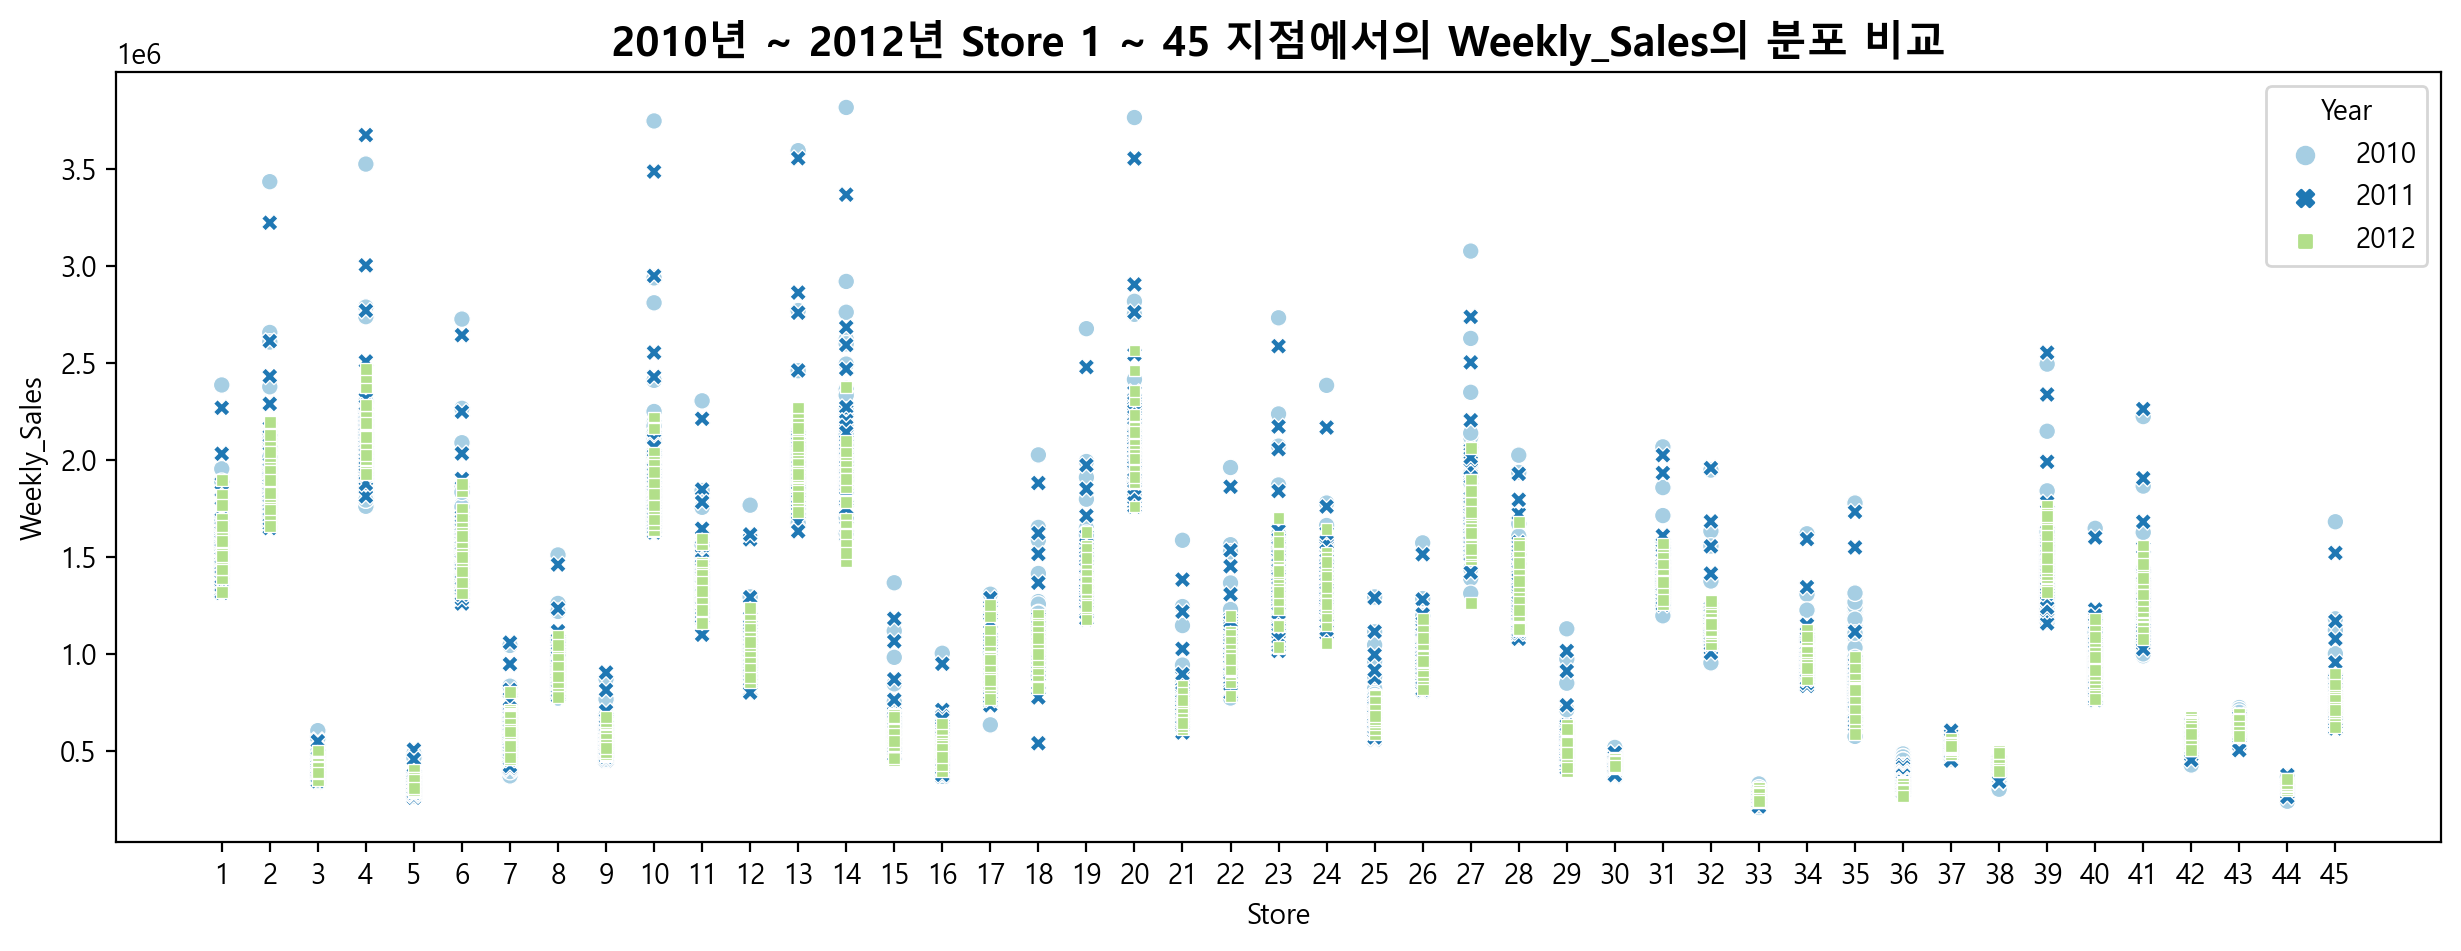

In [100]:
_=plt.figure(figsize=(15,5))
g=sns.scatterplot(data=df_train_copy, x="Store", y="Weekly_Sales", hue="Year", palette="Paired", style="Year")
_=g.set_xticks(np.arange(1, df_2010["Store"].nunique()+1))
_=plt.title("2010년 ~ 2012년 Store 1 ~ 45 지점에서의 Weekly_Sales의 분포 비교", fontdict={"fontsize":15, "fontweight":"bold"})

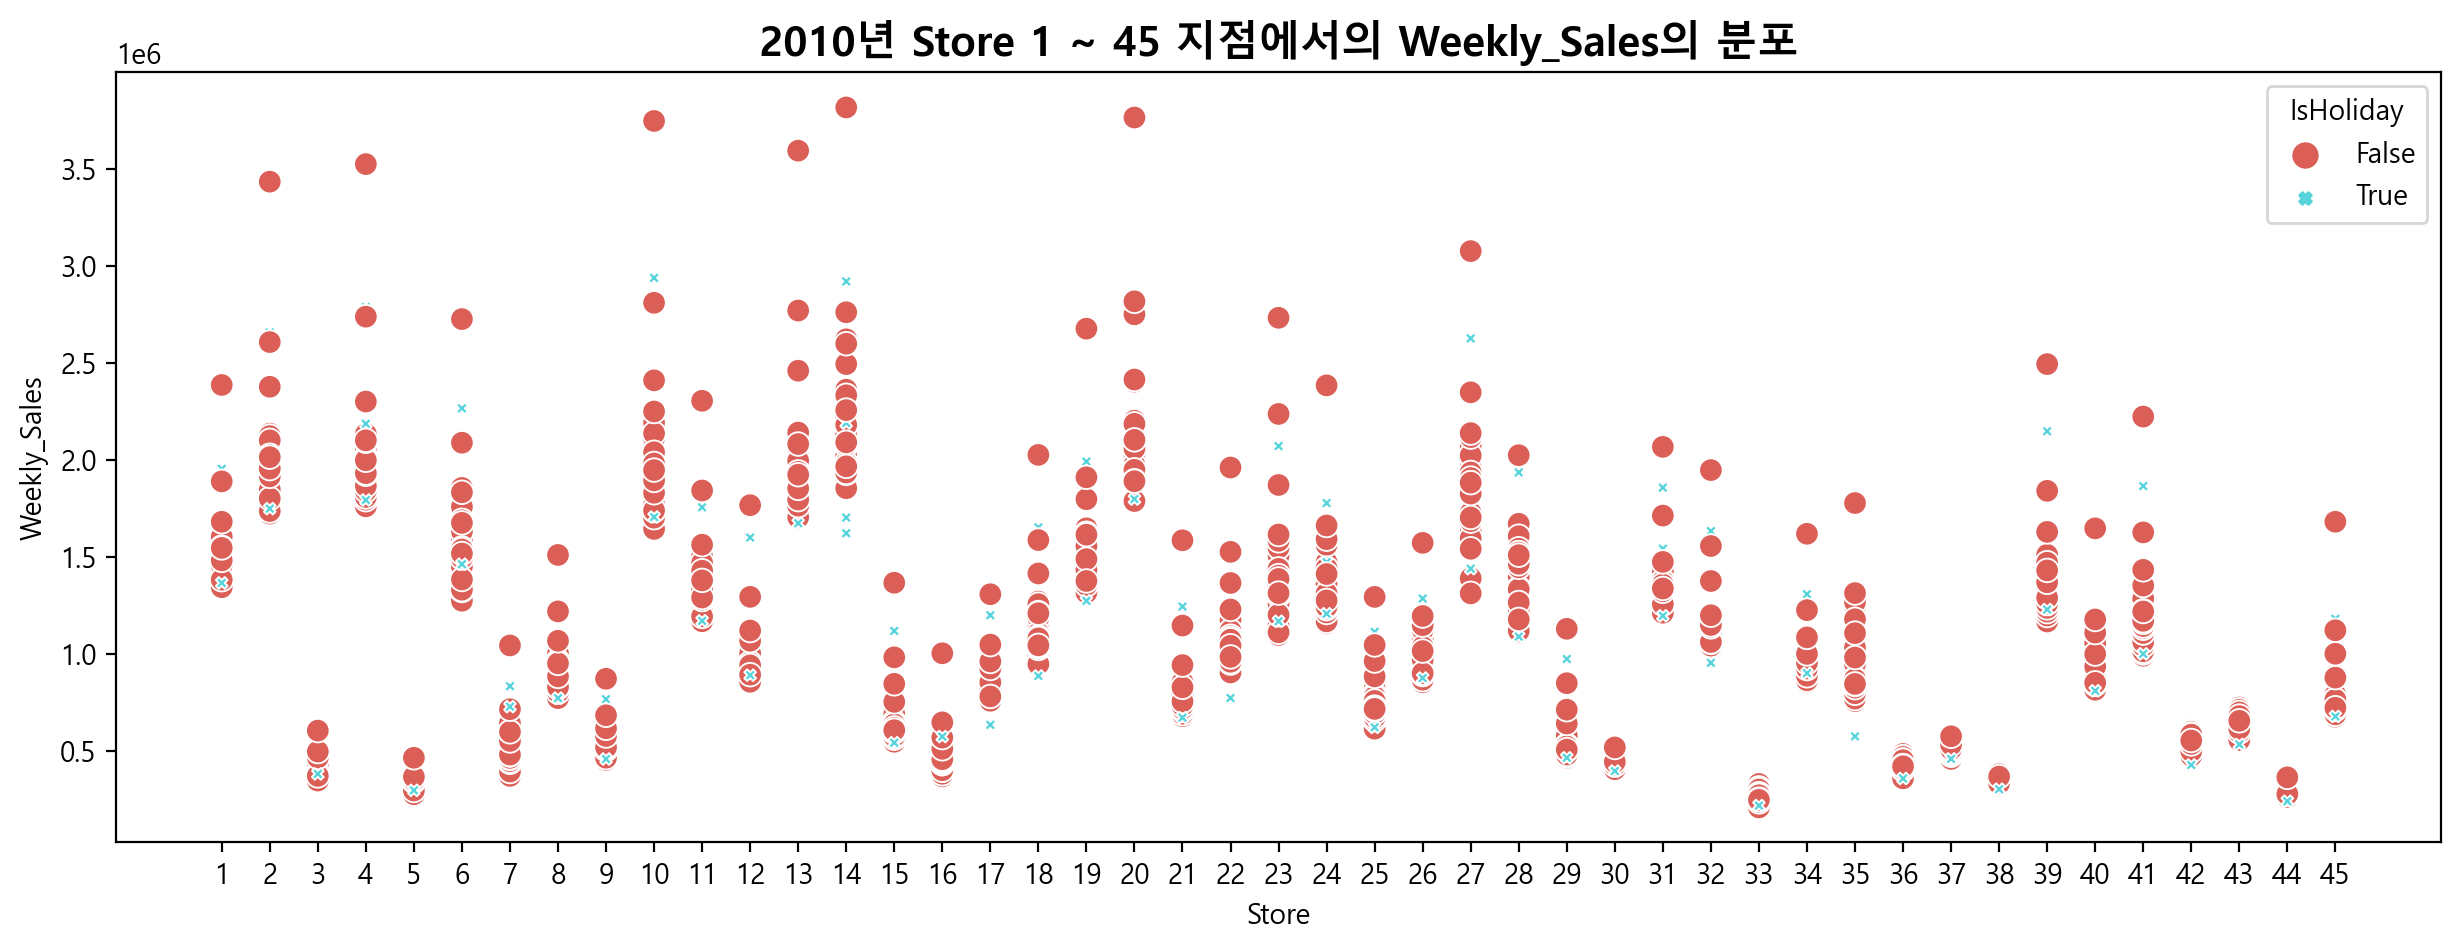

In [101]:
_=plt.figure(figsize=(15,5))
g=sns.scatterplot(data=df_2010, x="Store", y="Weekly_Sales", palette="hls", hue="IsHoliday", style="IsHoliday", size="IsHoliday")
_=g.set_xticks(np.arange(1, df_2010["Store"].nunique()+1))
_=plt.title("2010년 Store 1 ~ 45 지점에서의 Weekly_Sales의 분포", fontdict={"fontsize":15, "fontweight":"bold"})

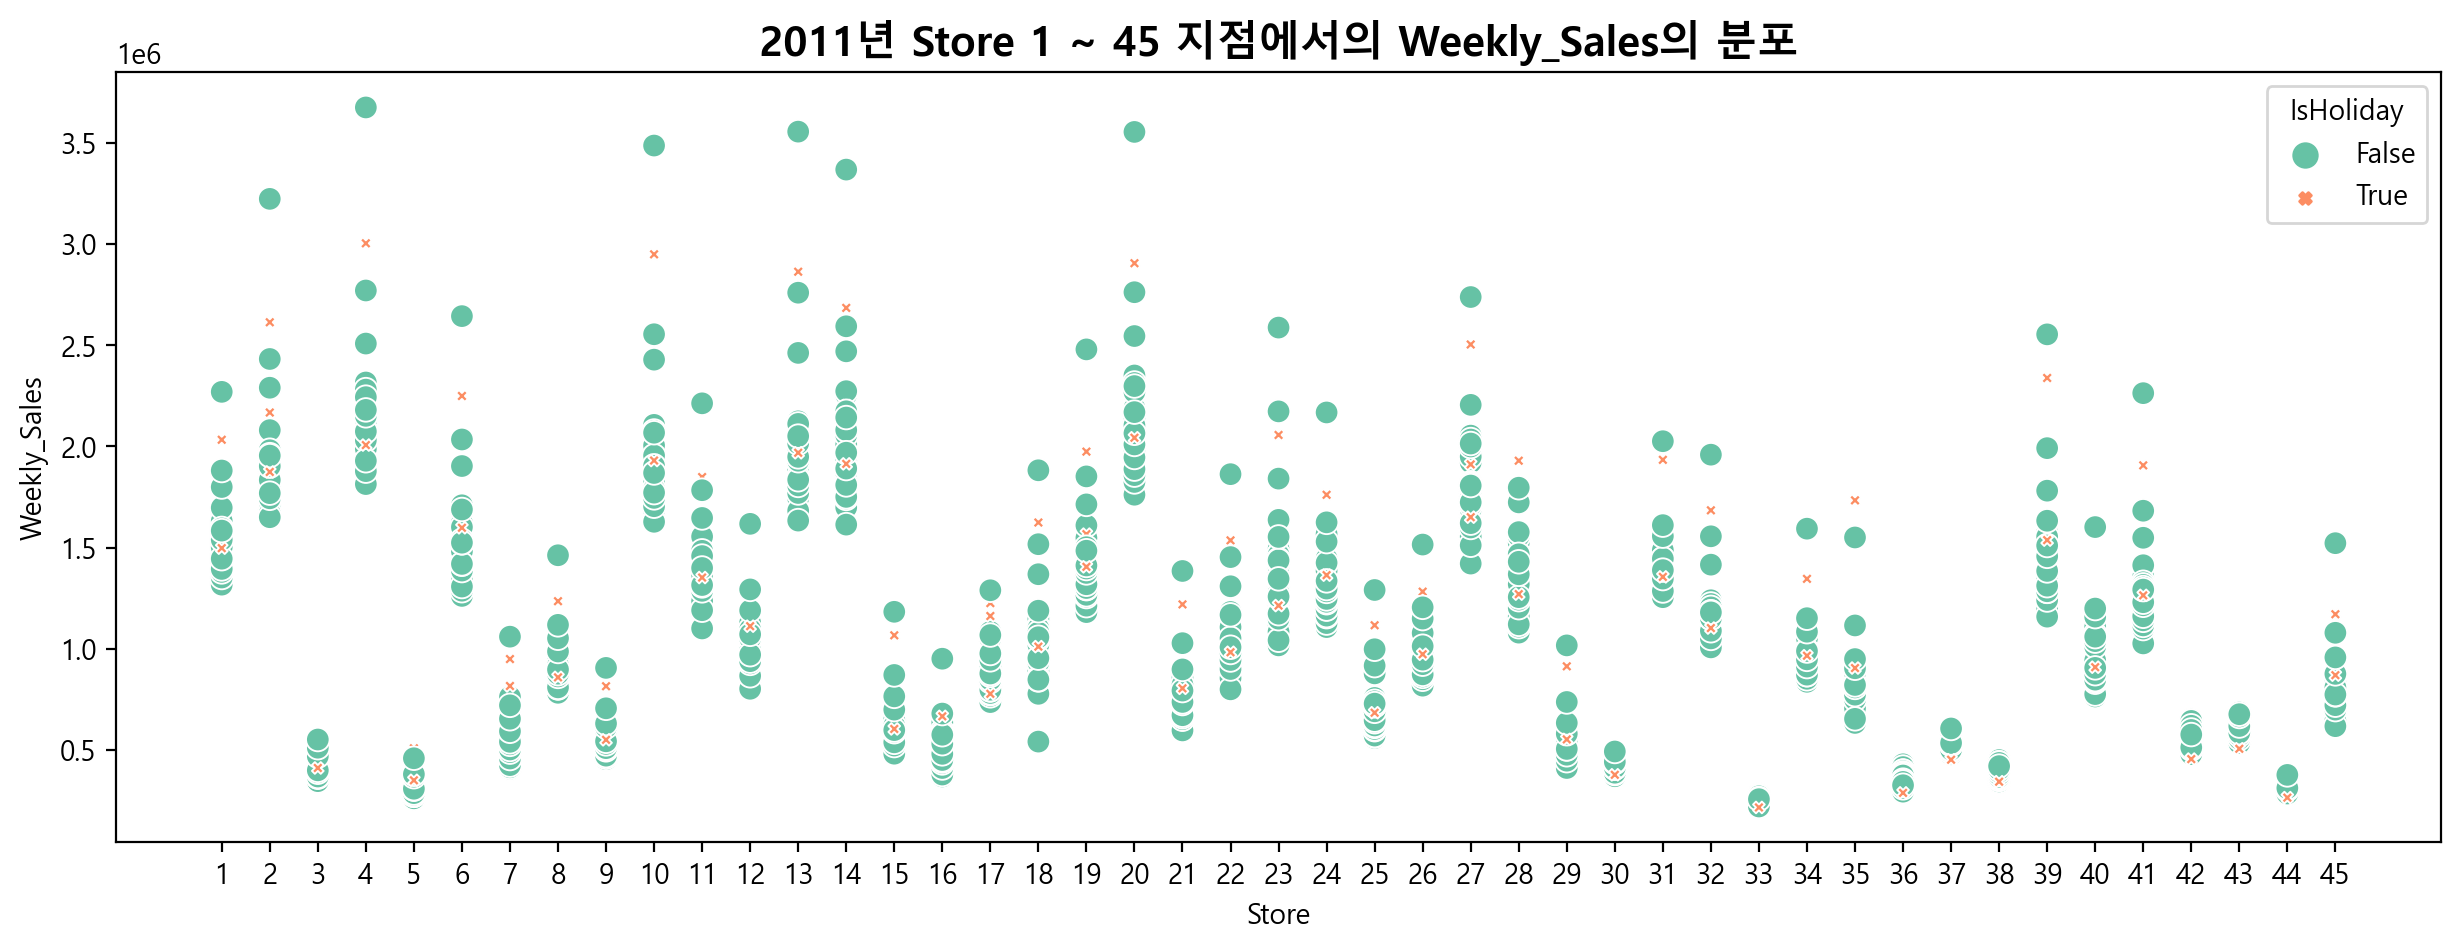

In [105]:
_=plt.figure(figsize=(15,5))
g=sns.scatterplot(data=df_2011, x="Store", y="Weekly_Sales", palette="Set2", hue="IsHoliday", style="IsHoliday", size="IsHoliday")
_=g.set_xticks(np.arange(1, df_2011["Store"].nunique()+1))
_=plt.title("2011년 Store 1 ~ 45 지점에서의 Weekly_Sales의 분포", fontdict={"fontsize":15, "fontweight":"bold"})

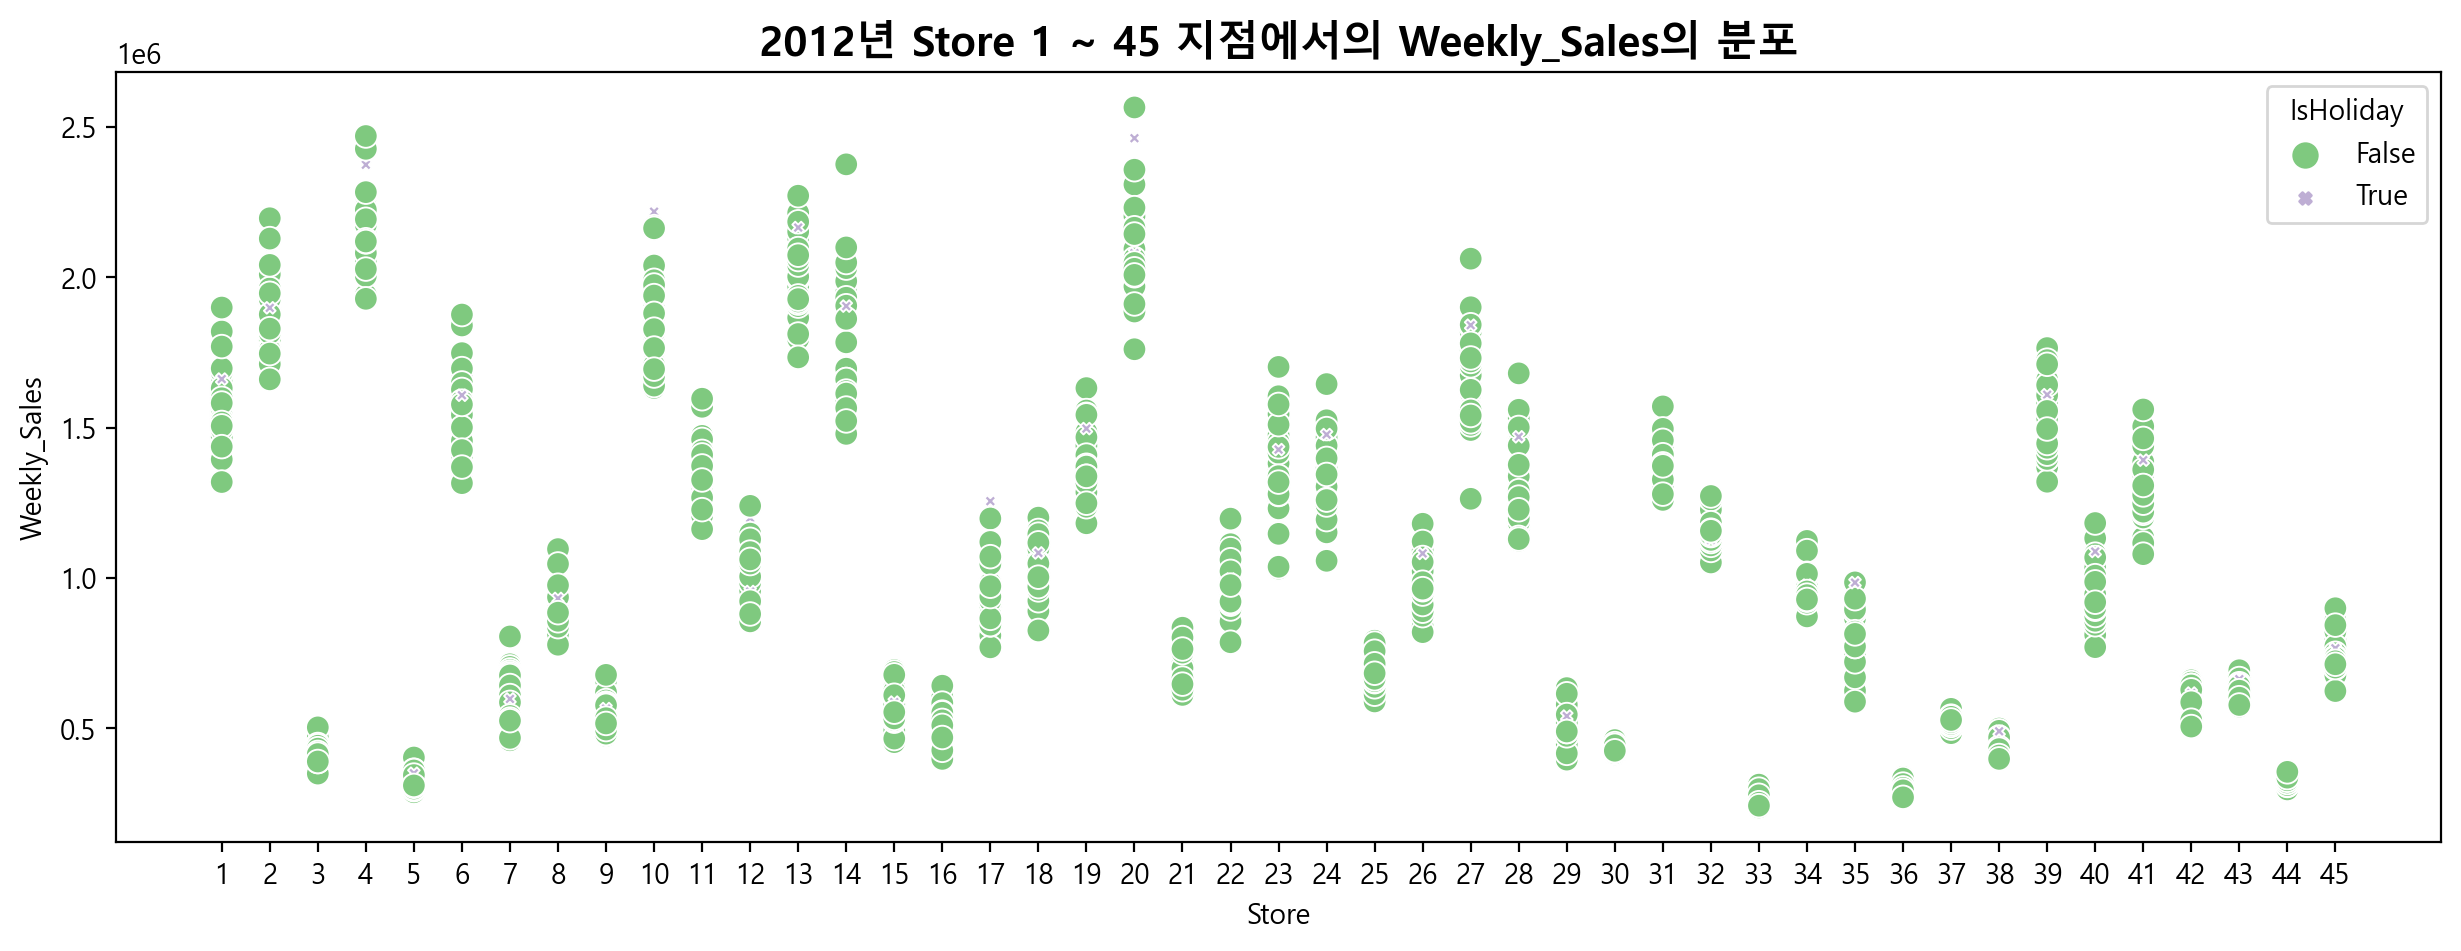

In [104]:
_=plt.figure(figsize=(15,5))
g=sns.scatterplot(data=df_2012, x="Store", y="Weekly_Sales", palette="Accent", hue="IsHoliday", style="IsHoliday", size="IsHoliday")
_=g.set_xticks(np.arange(1, df_2012["Store"].nunique()+1))
_=plt.title("2012년 Store 1 ~ 45 지점에서의 Weekly_Sales의 분포", fontdict={"fontsize":15, "fontweight":"bold"})

In [107]:
df_train_copy.columns

Index(['id', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Year', 'Month', 'Day'],
      dtype='object')

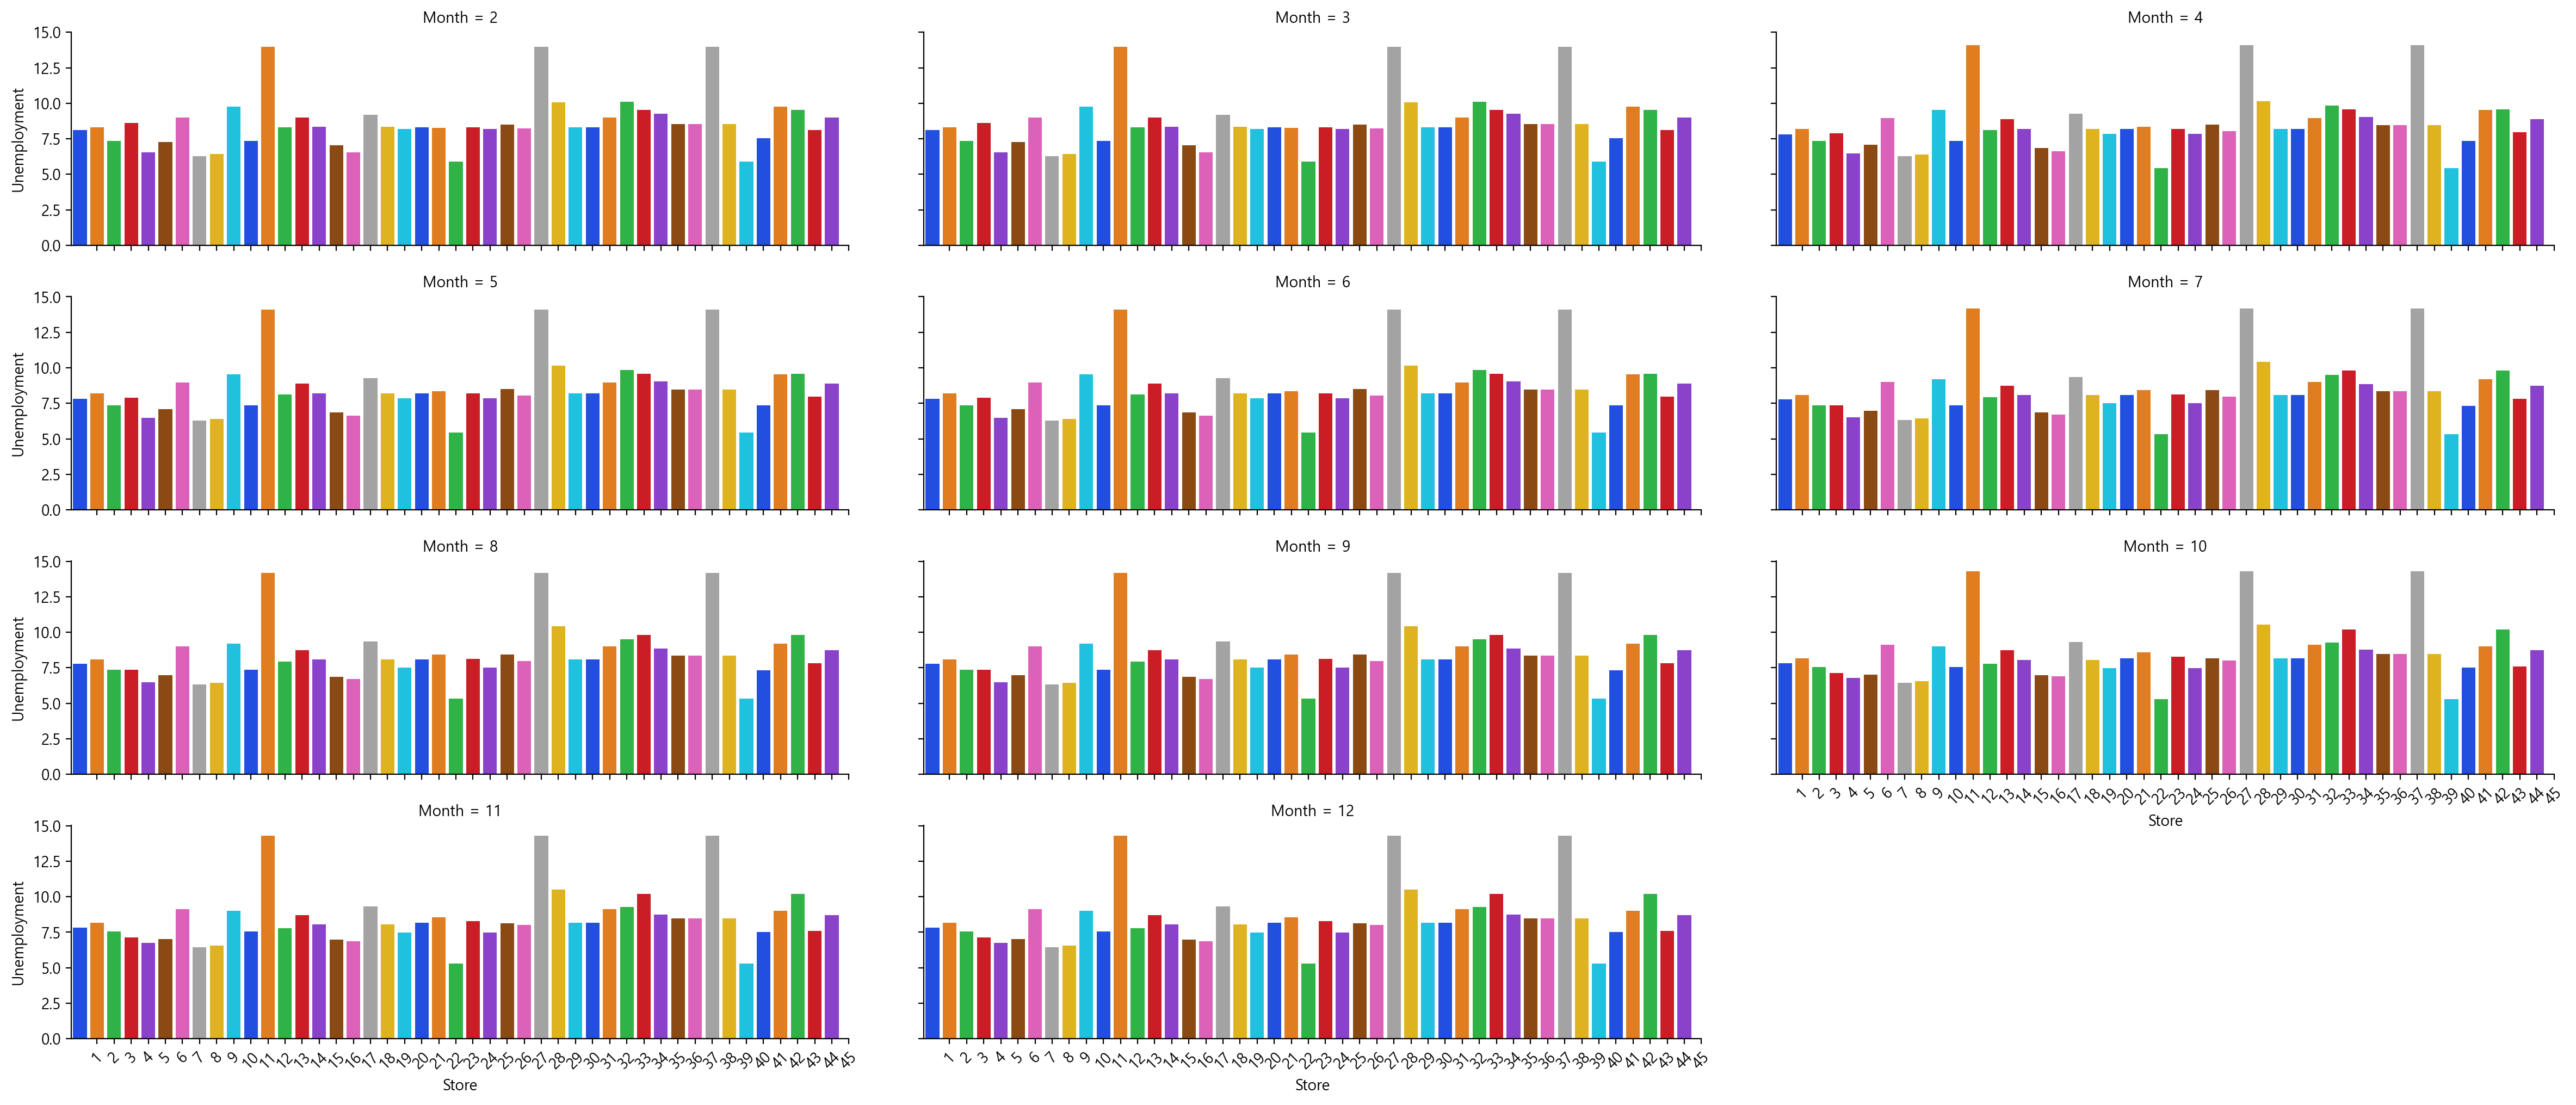

In [125]:
g=sns.FacetGrid(data=df_2010, col="Month", col_wrap=3)
_=g.map_dataframe(sns.barplot, x="Store", y="Unemployment", palette="bright")
_=g.fig.set_size_inches(25, 10) # figure, figsize가 안되는 경우가 있다. 이것을 이용하면 잘 돌아간다.
_=g.set(xticks=np.arange(1, df_2010["Store"].nunique()+1))
_=g.set_xticklabels(np.arange(1, df_2010["Store"].nunique()+1), rotation=45)